# Name: Omar M. Hussein
## Assignment Name: Assignment 12 Working with HTML, XML, JSON and Web APIs 
## Part I
### Books



1] David copperfield by Charles Dickens: <a href="https://www.amazon.com/Copperfield-Wordsworth-Classics-Charles-Dickens/dp/185326024X">David Copperfield</a>

- This book is on one of my favourite classic novels by Charles Dickens it was one of the first books i read and it is a true masterpiece.

- Pages: 768 pages
- Publisher: Wordsworth Editions Ltd
- Language: English
<img src="david.jpg">

2] C How to program by Paul Deitel, Harvey Deitel: <a href="https://www.amazon.com/C-How-Program-Paul-Deitel/dp/013299044X">C: How to Program</a>

- This is the first programming book i read and it was my first experience with coding and programming it was written by Paul Deitel, Harvey Deitel.

- Series: How to Program
- Pages: 912 pages
- Publisher: Prentice Hall
- Language: English
 <img src="c.jpg">

3] 12 Rules for Life Book by Jordan Peterson: <a href="https://www.amazon.com/12-Rules-Life-Antidote-Chaos/dp/0141988517/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1574901898&sr=1-2">12 Rules for life</a>

- This is a book by one of my favourite authors his name is Dr.Jordan Peterson and it was the best selling book of the year last year.

- Paperback: 448 pages
- Publisher: Penguin
- Language: English
 <img src="twe.jpg">


# Links
Below are the files that i created and uplouded to github
- HTML:  <a href="https://github.com/OMS1996/DAV-5400/blob/master/books_html">Books.html</a>
- XML :   <a href="https://github.com/OMS1996/DAV-5400/blob/master/Books.xml">Books.xml</a>
- JSON:  <a href="https://github.com/OMS1996/DAV-5400/blob/master/Books.json">Books.json</a>

# Loading Libraries into the the Notebook

In [1]:
import os
import pandas as pd
import requests 
import bs4 as bs
import json
from lxml import objectify
from pandas.io.json import json_normalize 
import matplotlib.pyplot

# HTML to Data

In [2]:
# reading the HTML
books_html = pd.read_html('https://raw.githubusercontent.com/OMS1996/DAV-5400/master/books_html')
# Getting the first element
html = books_html[0]
# printing the first three elements
html

,Title,Authors,Publisher,Language,Pages
0,David Copperfield,Charles Dickens,Wordsworth Editions Ltd,English,768
1,C How to program,"Paul Deitel, Harvey Deitel",Prentice Hall,English,912
2,12 Rules for life an antidote to chaos,Jordan Peterson,Penguin,English,448


# XML to Data

In [3]:
# Creating a file directory
file_dir = '/OmarM.H/file'

# if it does not exist create a new one
if not os.path.exists(file_dir):
    os.makedirs(file_dir)
    
# the url of the data    
url = ("https://raw.githubusercontent.com/OMS1996/DAV-5400/master/Books.xml")

# creating a request
response = requests.get(url)

#opening the content of the response and writing the xml file
with open('Books.xml', 'wb') as file:
    #Writing
    file.write(response.content)


In [4]:
#Books Path
path = 'Books.xml'
#parsing the data
parsed = objectify.parse(open(path))
#getting the root
root = parsed.getroot()
#Printing the root
root

<Element root at 0x19a23e2b5c8>

In [5]:
#the new list
data = []
#looping through the entire xml
for elt in root.Book:
    el_data = {}
    #getting the children
    for child in elt.getchildren():
        #getting the text in the child
        el_data[child.tag] = child.text
    # Appending the data
    data.append(el_data)
data;

In [6]:
#Data frame
xml = pd.DataFrame(data)

# Re-arranging the columns
xml=xml[["Title","Authors","Publisher","Language","Pages"]]
# Printing the XML file
xml

,Title,Authors,Publisher,Language,Pages
0,David Copperfield,Charles Dickens,Wordsworth Editions Ltd,English,768
1,C how to program,"Havey Deitel,Paul Deitel",Prentice Hall,English,912
2,12 Rules for life,Jordan Peterson,Penguin,English,448


# JSON to Data

In [7]:
#reading the JSON file
json = pd.read_json('https://raw.githubusercontent.com/OMS1996/DAV-5400/master/Books.json')
# Transposing and rearranging the dataframe to make it look like the rest of the data frames
json = json.transpose()[["Title","Authors","Publisher","Language","Pages"]]
# Printing
json

,Title,Authors,Publisher,Language,Pages
Book1,David Copperfield,Charles Dickens,Wordsworth Editions Ltd,English,768
Book2,C how to program,Havey Deitel Paul Deitel,Prentice Hall,English,912
Book3,12 Rules for life,Jordan Peterson,Penguin,English,448


### Are the three data frames identical?
No, they were not identical as some needed a bit of pre-processing to make them have similair structure for example the Json file needed to be transposed to look similair to the rest and it is the only one that has Books as indices instead of numbers another example would be the column order in the xml section was different from the html section and it had to be re-ordered.

In conclusion they were all different

# Part II
## Connect to Top Stories API  
- <a href="https://developer.nytimes.com/docs/top-stories-product/1/overview">Top Stories API</a>
- <a href="https://developer.nytimes.com/docs/top-stories-product/1/types/Article">Top Sories Article API for more information</a>


# Account,API, Key and Application Details
- Acount=ohussein@mail.yu.com
- Key_generated=1jhlRFfbtvGKD3rTFxPkFzxdqKCPTN08
- API in use Top Stories
- Application name= Assn12
- created 2019-11-28
- App ID 5b19ccf3-ae40-4401-8bcf-86144a1cf44b

# How to query the data base ?

https://api.nytimes.com/svc/topstories/v2/ + the stories you are interested in + .json? + api-key=1jhlRFfbtvGKD3rTFxPkFzxdqKCPTN08"


## 1.Health from top stories

In [8]:
# Getting the health URL
health_url= "https://api.nytimes.com/svc/topstories/v2/health.json?api-key=1jhlRFfbtvGKD3rTFxPkFzxdqKCPTN08"

nyt_health=pd.read_json(health_url)
nyt_health.head(4)

,status,copyright,section,last_updated,num_results,results
0,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,"{'section': 'Health', 'subsection': '', 'title..."
1,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,"{'section': 'Health', 'subsection': '', 'title..."
2,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,"{'section': 'Health', 'subsection': '', 'title..."
3,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,"{'section': 'Health', 'subsection': '', 'title..."


The results column in the data frame is in json format so that needs to be rectified by normalising it through json_normalize()

In [18]:
x=nyt_health.results[0]
x

AttributeError: 'DataFrame' object has no attribute 'results'

In [10]:
resultsdf=json_normalize(nyt_health.results)
json_normalize(nyt_health.results).head(2)

,abstract,byline,created_date,des_facet,geo_facet,item_type,kicker,material_type_facet,multimedia,org_facet,per_facet,published_date,section,short_url,subsection,title,updated_date,url
0,"Anger comes in many flavors, it turns out, and...",By BENEDICT CAREY,2019-11-27T05:00:31-05:00,"[Emotions, Psychology and Psychologists, Food,...",[],Article,,,[{'url': 'https://static01.nyt.com/images/2019...,[],"[MacCormack, Jennifer Kay, Faber, Nadira, Haus...",2019-11-27T05:00:31-05:00,Health,https://nyti.ms/2Dk89t9,,"Don’t Get Mad, but ‘Hangry’ Isn’t Really Angry",2019-11-27T08:44:35-05:00,https://www.nytimes.com/2019/11/27/health/food...
1,A large study found that M.R.I.s detected tumo...,By RONI CARYN RABIN,2019-11-27T17:00:07-05:00,"[your-feed-science, Mammography, Women and Gir...",[],Article,,,[{'url': 'https://static01.nyt.com/images/2019...,[New England Journal of Medicine],[],2019-11-27T17:00:07-05:00,Health,https://nyti.ms/2pYhbsX,,M.R.I.s Can Better Detect Cancer in Women With...,2019-11-27T23:45:45-05:00,https://www.nytimes.com/2019/11/27/health/dens...


### Deleting the duplicate results column after normalizing it and replacing it with its subcomponents forming one large data frame that entails all of our data in seperate coloumns.

In [11]:
del nyt_health['results']
new_health = pd.concat([nyt_health, resultsdf], axis=1)
new_health['published_date']=pd.to_datetime(new_health.published_date)
new_health.head(3)

,status,copyright,section,last_updated,num_results,abstract,byline,created_date,des_facet,geo_facet,...,multimedia,org_facet,per_facet,published_date,section,short_url,subsection,title,updated_date,url
0,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,"Anger comes in many flavors, it turns out, and...",By BENEDICT CAREY,2019-11-27T05:00:31-05:00,"[Emotions, Psychology and Psychologists, Food,...",[],...,[{'url': 'https://static01.nyt.com/images/2019...,[],"[MacCormack, Jennifer Kay, Faber, Nadira, Haus...",2019-11-27 05:00:31-05:00,Health,https://nyti.ms/2Dk89t9,,"Don’t Get Mad, but ‘Hangry’ Isn’t Really Angry",2019-11-27T08:44:35-05:00,https://www.nytimes.com/2019/11/27/health/food...
1,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,A large study found that M.R.I.s detected tumo...,By RONI CARYN RABIN,2019-11-27T17:00:07-05:00,"[your-feed-science, Mammography, Women and Gir...",[],...,[{'url': 'https://static01.nyt.com/images/2019...,[New England Journal of Medicine],[],2019-11-27 17:00:07-05:00,Health,https://nyti.ms/2pYhbsX,,M.R.I.s Can Better Detect Cancer in Women With...,2019-11-27T23:45:45-05:00,https://www.nytimes.com/2019/11/27/health/dens...
2,OK,Copyright (c) 2019 The New York Times Company....,health,2019-11-28T20:07:20-05:00,27,The electronic implants reduced Parkinson’s sy...,By DENISE GRADY,2019-11-27T16:00:09-05:00,"[Parkinson's Disease, Medical Devices, Brain, ...","[Lucerne (Switzerland), Australia]",...,[{'url': 'https://static01.nyt.com/images/2019...,"[Medtronic Inc, Abbott Laboratories, Boston Sc...",[],2019-11-27 16:00:09-05:00,Health,https://nyti.ms/2XQK9Hw,,Swimmers Beware of Deep Brain Stimulation,2019-11-27T16:19:07-05:00,https://www.nytimes.com/2019/11/27/health/swim...


## Now that we have the data how about we identify on which day has the most published titles for health?

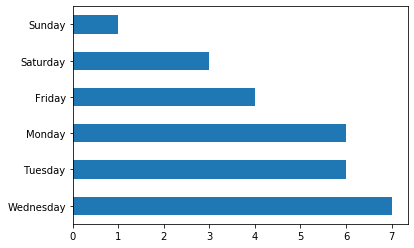

In [12]:
new_health.published_date.dt.weekday_name.value_counts().plot.barh();

## 2. Science from top stories

In [13]:
science ="https://api.nytimes.com/svc/topstories/v2/science.json?api-key=1jhlRFfbtvGKD3rTFxPkFzxdqKCPTN08"
nyt_science=pd.read_json(science)
nyt_science.head(4)

,status,copyright,section,last_updated,num_results,results
0,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,"{'section': 'Science', 'subsection': '', 'titl..."
1,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,"{'section': 'Science', 'subsection': '', 'titl..."
2,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,"{'section': 'Science', 'subsection': '', 'titl..."
3,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,"{'section': 'Science', 'subsection': '', 'titl..."


Normalizing

In [14]:
results_df=json_normalize(nyt_science.results)
json_normalize(nyt_science.results).head(1)

,abstract,byline,created_date,des_facet,geo_facet,item_type,kicker,material_type_facet,multimedia,org_facet,per_facet,published_date,section,short_url,subsection,title,updated_date,url
0,"Without that texture, there’d be none of us.",By DENNIS OVERBYE,2019-11-26T05:00:25-05:00,"[Space and Astronomy, Stars and Galaxies, Nobe...",[],Article,,,[{'url': 'https://static01.nyt.com/images/2019...,[],"[Guth, Alan H, Peebles, James, Smoot, George F...",2019-11-26T05:00:25-05:00,Science,https://nyti.ms/34pu6ms,,In Praise of Lumpy Gravy From the Cosmic Kitchen,2019-11-26T09:17:27-05:00,https://www.nytimes.com/2019/11/26/science/ast...


### Deleting the duplicate results column after normalizing it and replacing it with its subcomponents forming one large data frame that entails all of our data in seperate coloumns

In [15]:
del nyt_science['results']
new_science = pd.concat([nyt_science, results_df], axis=1)
new_science['published_date']=pd.to_datetime(new_science.published_date)
new_science.head(3)

,status,copyright,section,last_updated,num_results,abstract,byline,created_date,des_facet,geo_facet,...,multimedia,org_facet,per_facet,published_date,section,short_url,subsection,title,updated_date,url
0,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,"Without that texture, there’d be none of us.",By DENNIS OVERBYE,2019-11-26T05:00:25-05:00,"[Space and Astronomy, Stars and Galaxies, Nobe...",[],...,[{'url': 'https://static01.nyt.com/images/2019...,[],"[Guth, Alan H, Peebles, James, Smoot, George F...",2019-11-26 05:00:25-05:00,Science,https://nyti.ms/34pu6ms,,In Praise of Lumpy Gravy From the Cosmic Kitchen,2019-11-26T09:17:27-05:00,https://www.nytimes.com/2019/11/26/science/ast...
1,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,Biology. Chemistry. Physics. It’s all there on...,By MICHAEL ROSTON,2017-11-20T17:02:32-05:00,"[Thanksgiving Day, Food, Science and Technolog...",[],...,[{'url': 'https://static01.nyt.com/images/2017...,[],[],2017-11-20 17:02:32-05:00,Science,https://nyti.ms/2jI3U46,,A Helping of Science With Your Thanksgiving Di...,2018-11-21T22:01:34-05:00,https://www.nytimes.com/2017/11/20/science/tha...
2,OK,Copyright (c) 2019 The New York Times Company....,science,2019-11-28T20:07:26-05:00,21,Mysterious 609-million-year-old balls of cells...,By CARL ZIMMER,2019-11-27T11:00:09-05:00,"[Animals, Paleontology, Fossils, Evolution (Bi...",[China],...,[{'url': 'https://static01.nyt.com/images/2019...,[],"[Knoll, Andrew, Xiao, Shuhai, Donoghue, Philip...",2019-11-27 11:00:09-05:00,Science,https://nyti.ms/34oHQ0Q,,Is This the First Fossil of an Embryo?,2019-11-27T11:00:09-05:00,https://www.nytimes.com/2019/11/27/science/fos...


## Now that we have the data how about we identify on which day has the most published titles for science?

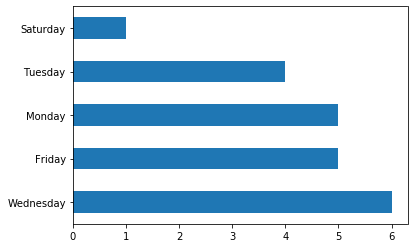

In [17]:
new_science.published_date.dt.weekday_name.value_counts().plot.barh();

# __Thank you from Omar M. Hussein__